# **Customer Loyalty Score Prediction**

## <span style='color: #6495ED;'>**Bank Customer Datatset Preprocessing** </span>

In [99]:
import pandas as pd
import numpy as np

In [100]:
df = pd.read_csv("/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [101]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [102]:
df.isnull().sum()


RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [103]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [104]:
# dropping columns that are less relevant for our use case
df.drop(["RowNumber", "CustomerId", "Surname", "Geography", "NumOfProducts", "Exited", "Complain"], axis=1, inplace=True)

In [105]:
df.dtypes

CreditScore             int64
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

## <span style='color: #6495ED;'>**Data Analysis** </span>

In [106]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [223]:
# Encoding Categorical Columns

from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
le_card_type = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Card Type'] = le_card_type.fit_transform(df['Card Type'])

print("Gender Classes Mapping:", {i: label for i, label in enumerate(le_gender.classes_)})
print("Card Type Classes Mapping:", {i: label for i, label in enumerate(le_card_type.classes_)})

Gender Classes Mapping: {0: 'Female', 1: 'Male'}
Card Type Classes Mapping: {0: 'DIAMOND', 1: 'GOLD', 2: 'PLATINUM', 3: 'SILVER'}


In [107]:
df.head()  

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned
0,619,0,42,2,0.00,1,1,101348.88,2,0,464
1,608,0,41,1,83807.86,0,1,112542.58,3,0,456
2,502,0,42,8,159660.80,1,0,113931.57,3,0,377
3,699,0,39,1,0.00,0,0,93826.63,5,1,350
4,850,0,43,2,125510.82,1,1,79084.10,5,1,425


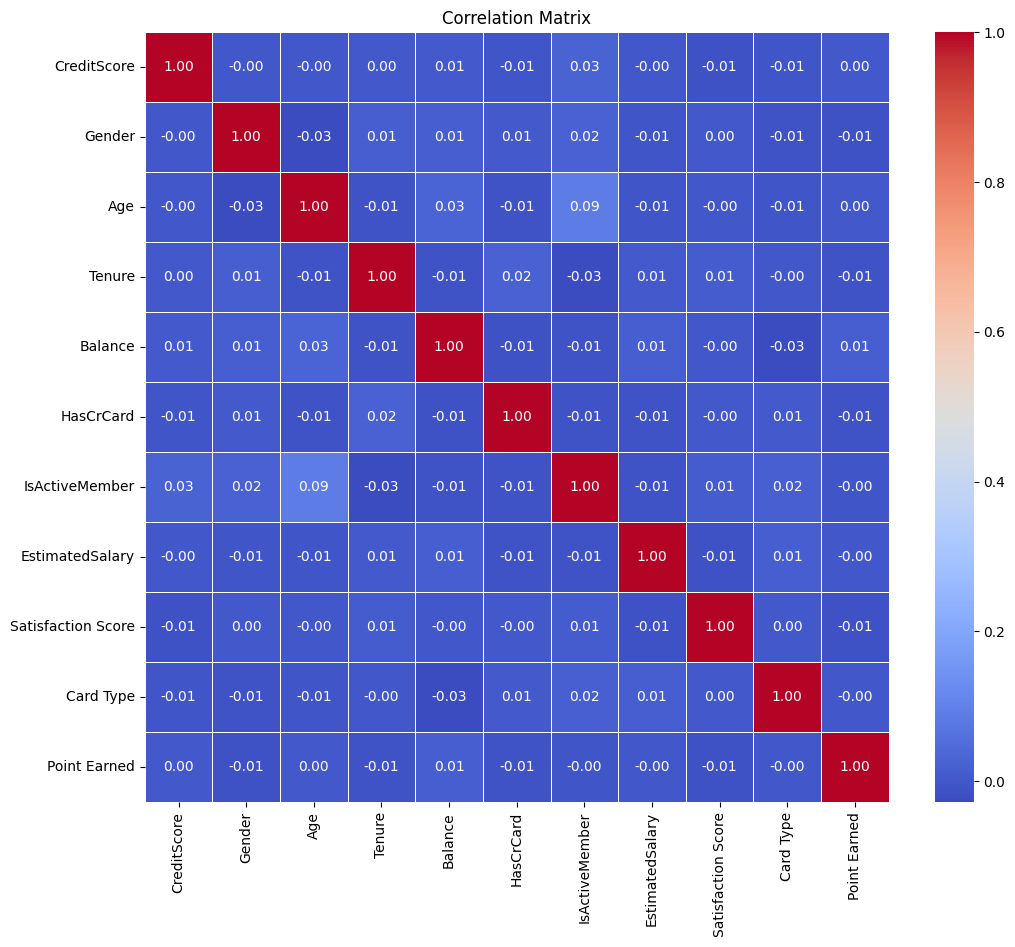

In [108]:
corr_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [109]:
df.groupby('Gender')['Age'].mean()

Gender
0    39.238389
1    38.658237
Name: Age, dtype: float64

In [110]:
df.groupby('Card Type')['Age'].mean()

Card Type
0    38.991225
1    38.938449
2    39.008016
3    38.749199
Name: Age, dtype: float64

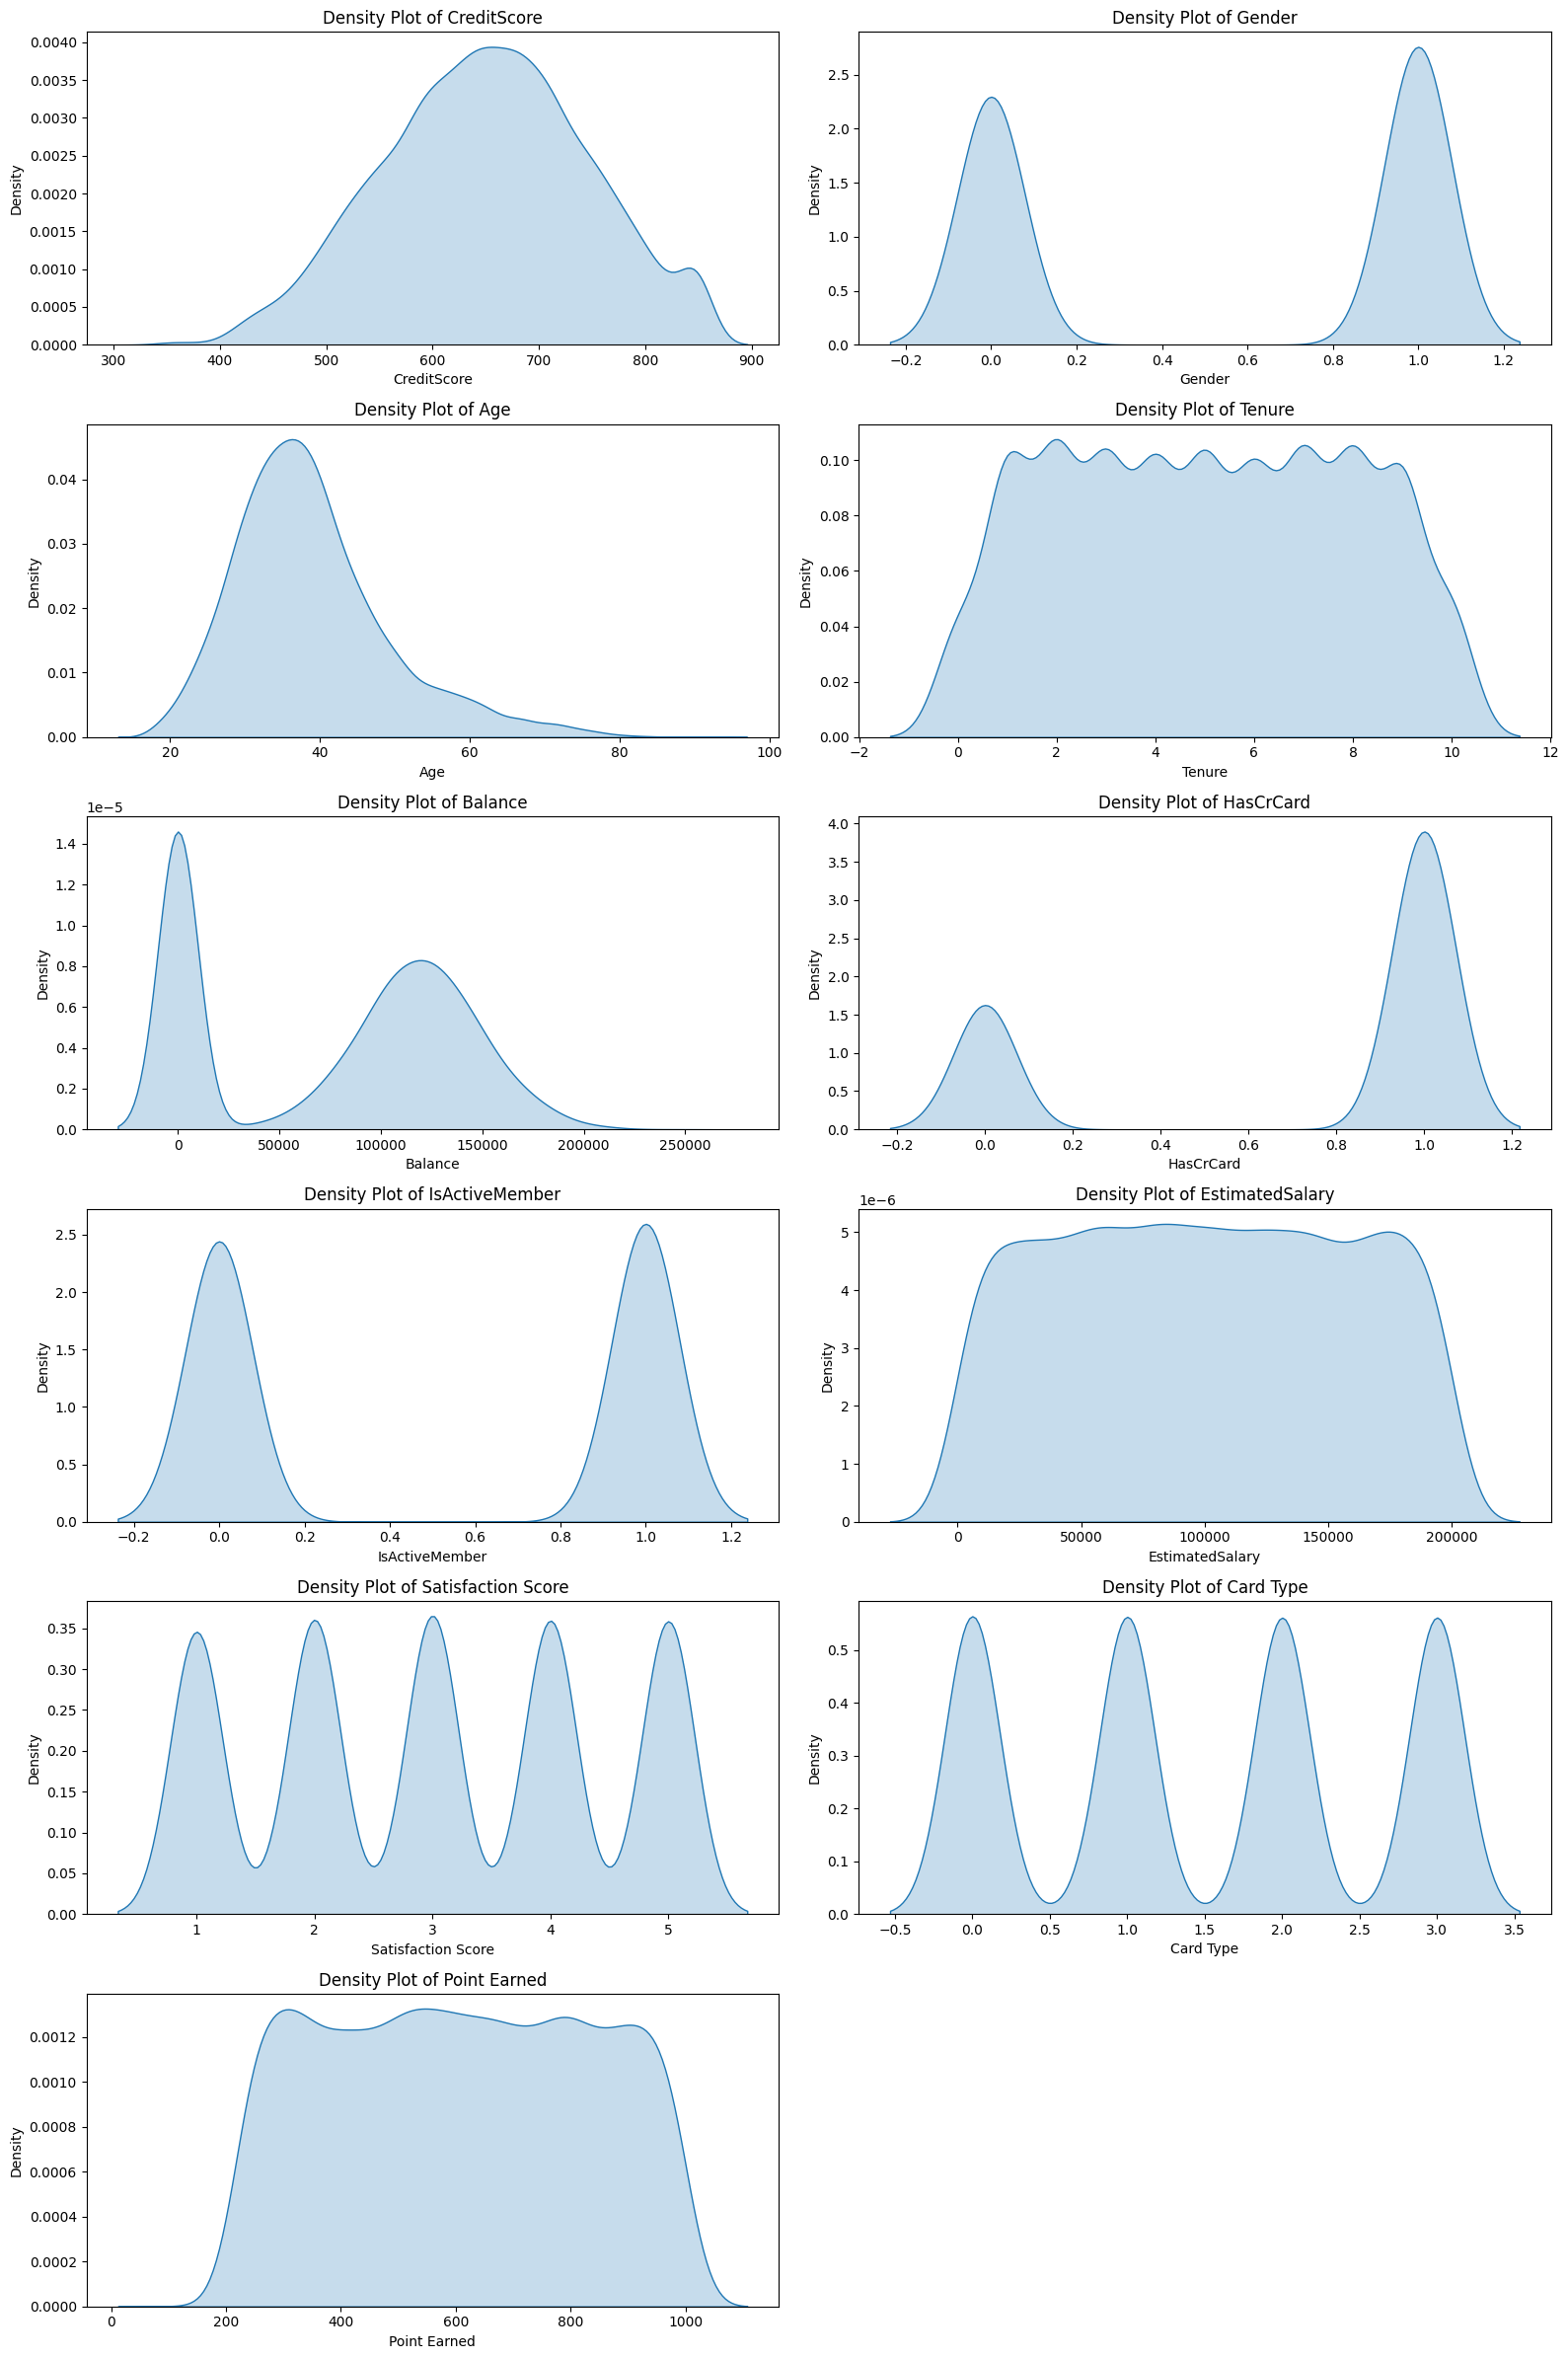

In [111]:
# Density distribution for each feature

num_columns = 2
num_rows = (len(df.columns) + 1) // num_columns

plt.figure(figsize=(16, 4 * num_rows))
for i, col in enumerate(df.columns):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

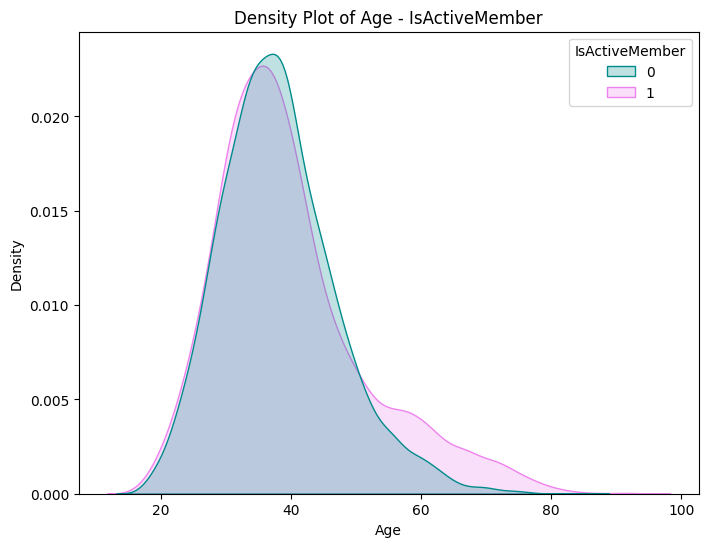

In [112]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Age', hue='IsActiveMember', fill=True, palette=['#008B8B','#EE82EE'])
plt.title('Density Plot of Age - IsActiveMember')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [113]:
# Identifying the best features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.drop('Point Earned', axis=1)
y = df['Point Earned']

k=10
bestfeatures = SelectKBest(score_func=chi2, k=k)
fit = bestfeatures.fit(X, y)

# Get the scores for each feature
featureScores = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(fit.scores_)], axis=1)
featureScores.columns = ['Feature','Score']
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Feature,Score
4,Balance,3.947961e+07
7,EstimatedSalary,2.578739e+07
0,CreditScore,1.111006e+04
2,Age,2.272100e+03
3,Tenure,1.394979e+03
9,Card Type,6.402715e+02
8,Satisfaction Score,5.258291e+02
6,IsActiveMember,4.004383e+02
1,Gender,3.678184e+02
5,HasCrCard,2.324633e+02


## <span style='color: #6495ED;'>**Preparing Data For Training** </span>

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [115]:
# Split the data into training and testing sets
X = df.drop('Point Earned', axis=1)
y = df['Point Earned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
# Standardizing the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## <span style='color: #6495ED;'>**Model Training** </span>

### **Approaching it as Regression Problem**
### Using XGBoost regressor

In [117]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                           max_depth = 10, alpha = 10, n_estimators = 10)

xgb_reg.fit(X_train_scaled, y_train)
y_pred = xgb_reg.predict(X_test_scaled)

rmse = mean_squared_error(y_test, y_pred)
print("MSE: %f" % (rmse))

MSE: 52844.466182


In [118]:
y_test.describe()

count    2000.000000
mean      605.507500
std       229.826987
min       119.000000
25%       408.000000
50%       606.500000
75%       803.250000
max      1000.000000
Name: Point Earned, dtype: float64

In [62]:
pd.Series(y_pred).describe()

count    2000.000000
mean      606.658020
std        15.202428
min       554.851562
25%       598.099030
50%       606.048920
75%       614.924561
max       680.855225
dtype: float64

### Using Neural Networks

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test MSE: {loss}')

Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 286046.6562
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 53935.2969
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 52606.4492
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 52156.1953
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 51873.2656
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 51636.9531
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 51388.8359
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 51265.0234
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 51180.7266
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 50991.4336
Test MSE: 54708.64453125


In [71]:
y_pred = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [74]:
pd.Series(np.array(y_pred).reshape(-1)).describe()

count    2000.000000
mean      616.171082
std        36.731075
min       527.773926
25%       590.082733
50%       612.509583
75%       639.752304
max       787.506775
dtype: float64

### **Approaching it as Classification Problem**


After thorough evaluation, we have decided to approach our customer loyalty analysis as a classification problem rather than a regression task. This strategic shift stems from following observation:
- Initially, we utilized regression models to predict customer loyalty scores. However, this approach did not yield satisfactory results. Specifically, the regression models struggled to achieve high accuracy levels and, crucially, failed to capture the full spectrum of customer loyalty scores.

To facilitate this classification approach, we will convert the existing loyalty scores, which currently range from 0 to 1000, into a rating system of 1 to 10. This conversion simplifies the model's output, making it more straightforward for business applications, such as targeted marketing strategies and personalized customer engagement plans.

### <span style='color: #6495ED;'>**Preparing Target Labels** </span>

In [145]:
df['loyalty_rating'] = pd.cut(df['Point Earned'], bins=np.linspace(0, 1000, 11), labels=list(np.linspace(1, 10, 10, dtype=int)), include_lowest=True).astype(int)

In [146]:
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Card Type,Point Earned,loyalty_rating
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,0.70550,0.515100,100090.239881,3.013800,1.498000,606.515100,6.554800
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.45584,0.499797,57510.492818,1.405919,1.118356,225.924839,2.253066
min,350.000000,0.000000,18.000000,0.000000,0.000000,0.00000,0.000000,11.580000,1.000000,0.000000,119.000000,2.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,0.00000,0.000000,51002.110000,2.000000,0.000000,410.000000,5.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.00000,1.000000,100193.915000,3.000000,1.000000,605.000000,7.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,1.00000,1.000000,149388.247500,4.000000,2.000000,801.000000,9.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,1.00000,1.000000,199992.480000,5.000000,3.000000,1000.000000,10.000000


In [147]:
df['loyalty_rating'].value_counts()

loyalty_rating
6     1350
8     1279
7     1274
4     1267
10    1258
9     1243
5     1239
3     1088
2        2
Name: count, dtype: int64

In [197]:
# Split the data into training and testing sets
X = df.drop(['Point Earned', 'loyalty_rating'], axis=1)
y = df['loyalty_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [198]:
# Standardizing the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### <span style='color: #6495ED;'>**Classification Model Training** </span>

### Using Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.1215

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.20      0.02      0.03       236
           4       0.12      0.11      0.11       249
           5       0.17      0.09      0.12       259
           6       0.13      0.35      0.19       241
           7       0.12      0.17      0.14       238
           8       0.11      0.10      0.10       268
           9       0.11      0.08      0.09       246
          10       0.09      0.06      0.07       262

    accuracy                           0.12      2000
   macro avg       0.12      0.11      0.10      2000
weighted avg       0.13      0.12      0.11      2000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using SVM

In [139]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', random_state=42)

svm_classifier.fit(X_train_scaled, y_train)
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.1155

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.13      0.03      0.04       236
           4       0.10      0.09      0.10       249
           5       0.12      0.10      0.11       259
           6       0.11      0.24      0.15       241
           7       0.15      0.19      0.17       238
           8       0.12      0.12      0.12       268
           9       0.09      0.09      0.09       246
          10       0.12      0.07      0.09       262

    accuracy                           0.12      2000
   macro avg       0.10      0.10      0.10      2000
weighted avg       0.12      0.12      0.11      2000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using Convolutional Neural Networks

In [200]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Reshape data for CNN
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# One-hot encode the target variable
y_train_encoded = tf.keras.utils.to_categorical(y_train - 1, num_classes=10)
y_test_encoded = tf.keras.utils.to_categorical(y_test - 1, num_classes=10)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 10 classes for loyalty_rating

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_reshaped, y_train_encoded, epochs=50, batch_size=32, validation_split=0.05, verbose=1)

Epoch 1/50
283/283 [==============================] - 2s 3ms/step - loss: 2.2667 - accuracy: 0.1278 - val_loss: 2.1287 - val_accuracy: 0.1284
Epoch 2/50
283/283 [==============================] - 1s 3ms/step - loss: 2.1239 - accuracy: 0.1332 - val_loss: 2.0996 - val_accuracy: 0.0905
Epoch 3/50
283/283 [==============================] - 1s 3ms/step - loss: 2.0986 - accuracy: 0.1344 - val_loss: 2.0832 - val_accuracy: 0.1432
Epoch 4/50
283/283 [==============================] - 1s 3ms/step - loss: 2.0846 - accuracy: 0.1366 - val_loss: 2.0763 - val_accuracy: 0.1537
Epoch 5/50
283/283 [==============================] - 1s 3ms/step - loss: 2.0830 - accuracy: 0.1433 - val_loss: 2.0813 - val_accuracy: 0.1305
Epoch 6/50
283/283 [==============================] - 1s 3ms/step - loss: 2.0794 - accuracy: 0.1461 - val_loss: 2.0769 - val_accuracy: 0.1558
Epoch 7/50
283/283 [==============================] - 1s 3ms/step - loss: 2.0785 - accuracy: 0.1466 - val_loss: 2.0855 - val_accuracy: 0.1579
Epoch 

In [202]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded, verbose=0)
print(f'Test accuracy: {accuracy}')

Test accuracy: 0.10400000214576721


## <span style='color: #6495ED;'>**Using Residual Networks (Best Performing)** </span>

In [206]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Add, Activation
from tensorflow.keras.optimizers import Adam

# One-hot encode the target variable
y_train_encoded = tf.keras.utils.to_categorical(y_train - 1, num_classes=10)
y_test_encoded = tf.keras.utils.to_categorical(y_test - 1, num_classes=10)

# ResNet-like architecture
input_shape = X_train_scaled.shape[1]
inputs = Input(shape=(input_shape,))

# First layer
x = Dense(64, activation='relu')(inputs)
x = BatchNormalization()(x)

# Residual blocks
for _ in range(3):
    identity = x
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Add()([x, identity])
    x = Activation('relu')(x)

x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_encoded, epochs=500, batch_size=32, validation_split=0.05, verbose=1)

Epoch 1/500
283/283 [==============================] - 5s 4ms/step - loss: 2.6475 - accuracy: 0.1221 - val_loss: 2.1938 - val_accuracy: 0.1432
Epoch 2/500
283/283 [==============================] - 1s 4ms/step - loss: 2.2237 - accuracy: 0.1388 - val_loss: 2.2380 - val_accuracy: 0.1474
Epoch 3/500
283/283 [==============================] - 1s 4ms/step - loss: 2.1475 - accuracy: 0.1514 - val_loss: 2.1845 - val_accuracy: 0.1537
Epoch 4/500
283/283 [==============================] - 1s 4ms/step - loss: 2.1174 - accuracy: 0.1601 - val_loss: 2.2128 - val_accuracy: 0.1326
Epoch 5/500
283/283 [==============================] - 1s 3ms/step - loss: 2.0918 - accuracy: 0.1723 - val_loss: 2.1991 - val_accuracy: 0.1411
Epoch 6/500
283/283 [==============================] - 1s 3ms/step - loss: 2.0736 - accuracy: 0.1690 - val_loss: 2.2122 - val_accuracy: 0.1368
Epoch 7/500
283/283 [==============================] - 1s 4ms/step - loss: 2.0643 - accuracy: 0.1789 - val_loss: 2.2179 - val_accuracy: 0.1158

In [207]:
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f'Test accuracy: {accuracy}')

Test accuracy: 0.12399999797344208


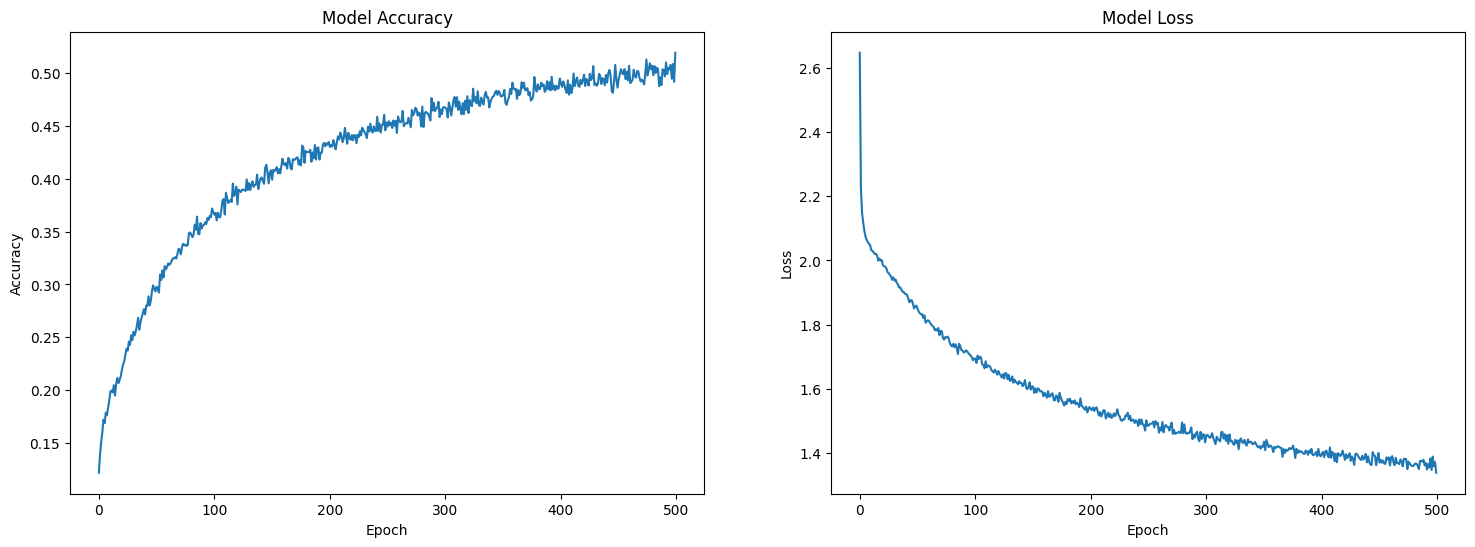

In [225]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

In [213]:
model.save('resnet_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [218]:
# %cd /kaggle/working

# from IPython.display import FileLink 
# FileLink(r'resnet_model.h5')